In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import math

interactive(children=(FloatSlider(value=1.0, description='phi', max=6.293185307179586), Output()), _dom_classe…

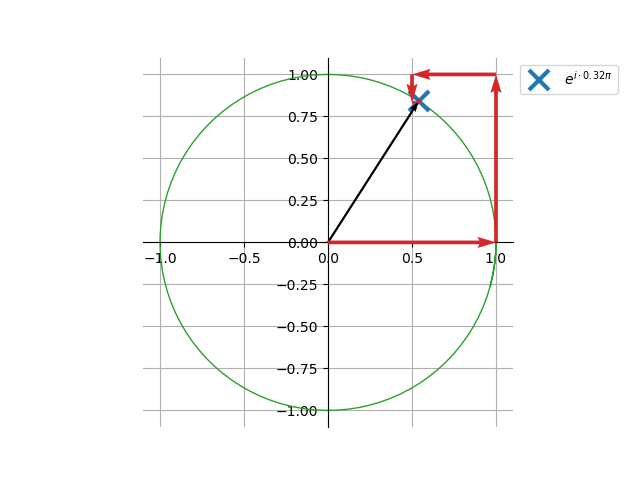

In [2]:
phi = 1
fig = plt.figure()
ax = plt.gca()
# Centered axes with arrows
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Unit Circle, parametric equation
t = np.linspace(-np.pi / 12, np.pi * 2, 100)
x = np.cos(t)
y = np.sin(t)
# plt.plot(x, y, "C2-", lw=1)


def make_spiral(phi):
    plt.plot(x, y, "C2-", lw=1)
    # Calculate complex number on a unit circle from supplied argument
    z = np.exp(1j * phi)
    # Plot z and its vector
    ax.plot(z.real, z.imag, "x", ms=14, mew=3, c="C0",label=f'$e^{{i\cdot{phi/np.pi:.2f}\pi}}$')
    ax.quiver(
        np.real(z),
        np.imag(z),
        scale_units="xy",
        scale=1,
        width=0.006,
        color="k",
        zorder=4,
    )

    # Define series, up to some number (20)
    s = np.array(
        [0 + 0j]
        + [1 + 0j, 1j * phi]
        + [(1j * phi) ** i / math.factorial(i) for i in range(2, 30)]
    )
    # Plot the spiral in a cicle
    [
        plt.quiver(
            sum(s[:i]).real,  # initial point, real coordinate
            sum(s[:i]).imag,  # initial point, imaginary coordinate
            s[i].real,  # end point, real coordinate
            s[i].imag,  # end point, imaginary coordinate
            scale_units="xy",
            scale=1,
            width=0.01,
            color="C3",
            zorder=5,
        )
        for i in range(1, len(s))
    ]
    lim = np.abs(s).max() + 0.1
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])
    ax.legend(loc=2,bbox_to_anchor=[1,1])

ax.set_aspect("equal")
plt.grid(zorder=0)


@widgets.interact(phi=(0, 2 * np.pi + 0.01, 0.1))
def update(phi=1):
    """Remove old lines from plot and plot new one"""
    [artist.remove() for artist in plt.gca().lines + plt.gca().collections]
    make_spiral(phi)